In [ ]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

# Setting visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Libraries berhasil di-import!")

Libraries berhasil di-import!


In [ ]:
# Upload file dari local
from google.colab import files
uploaded = files.upload()

In [ ]:
# Baca dataset
df = pd.read_csv('song_data.csv')

print("Dataset berhasil dibaca!")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")


# Cek nama kolom
print("=" * 50)
print("Nama Kolom:")
print("=" * 50)
print(df.columns.tolist())

Dataset berhasil dibaca!
Jumlah baris: 18835
Jumlah kolom: 15
Nama Kolom:
['song_name', 'song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']


In [ ]:
# Tampilkan 5 baris pertama
print("=" * 50)
print("5 Baris Pertama Dataset:")
print("=" * 50)
df.head()

5 Baris Pertama Dataset:


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [ ]:
# Statistik deskriptif
print("=" * 50)
print("Statistik Deskriptif:")
print("=" * 50)
df.describe()

Statistik Deskriptif:


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


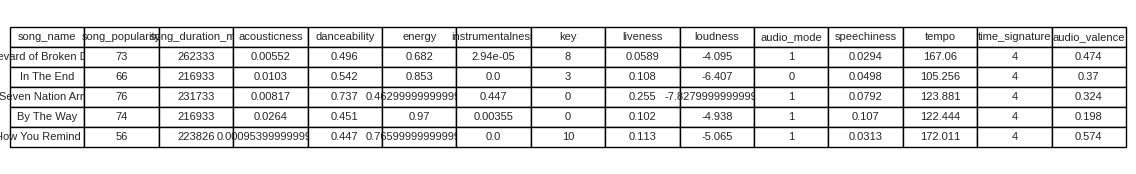

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Ambil 5 baris pertama
df_head = df.head()

# Buat figure
fig, ax = plt.subplots(figsize=(12, 2))  # atur ukuran sesuai kebutuhan
ax.axis('off')  # sembunyikan sumbu

# Tampilkan tabel di dalam gambar
table = ax.table(
    cellText=df_head.values,
    colLabels=df_head.columns,
    cellLoc='center',
    loc='center'
)

# Ubah ukuran teks biar rapi
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)

In [ ]:
# Cek missing values
print("=" * 50)
print("Missing Values:")
print("=" * 50)
missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Kolom': missing.index,
    'Jumlah Missing': missing.values,
    'Persentase (%)': missing_percent.values
})

# Filter hanya kolom yang ada missing values
missing_filtered = missing_df[missing_df['Jumlah Missing'] > 0]

if len(missing_filtered) > 0:
    print(missing_filtered)

    # Visualisasi missing values
    plt.figure(figsize=(12, 6))
    missing_percent[missing_percent > 0].plot(kind='bar', color='coral')
    plt.title('Persentase Missing Values per Kolom', fontsize=14, fontweight='bold')
    plt.xlabel('Kolom')
    plt.ylabel('Persentase (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("✅ Tidak ada missing values dalam dataset!")
    print("Dataset sudah bersih dari missing values.")


# Cek duplikat
print("=" * 50)
print("Duplikat Data:")
print("=" * 50)
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

if duplicates > 0:
    print("\nContoh baris duplikat:")
    print(df[df.duplicated(keep=False)].head(10))

Missing Values:
✅ Tidak ada missing values dalam dataset!
Dataset sudah bersih dari missing values.
Duplikat Data:
Jumlah baris duplikat: 3909

Contoh baris duplikat:
                     song_name  song_popularity  song_duration_ms  \
6                  Last Resort               81            199893   
7     Are You Gonna Be My Girl               76            213800   
8               Mr. Brightside               80            222586   
9                  Sex on Fire               81            203346   
10                  The Middle               78            168253   
12             Smooth Criminal               75            209266   
13                  Can't Stop               81            269000   
15                 Take Me Out               77            237026   
18  I Write Sins Not Tragedies               77            187613   
19                  Kryptonite               79            233933   

    acousticness  danceability  energy  instrumentalness  key  liveness  

In [ ]:
# Kolom identitas (tidak digunakan untuk KNN)
id_columns = ['song_name']

# Kolom fitur audio (digunakan untuk KNN)
feature_columns = [
    'acousticness',
    'danceability',
    'energy',
    'liveness',
    'loudness',
    'speechiness',
    'tempo',
    'audio_valence']

print("=" * 50)
print("Kolom Fitur untuk KNN:")
print("=" * 50)
for i, col in enumerate(feature_columns, 1):
    print(f"{i}. {col}")
print(f"\nTotal fitur: {len(feature_columns)}")

Kolom Fitur untuk KNN:
1. acousticness
2. danceability
3. energy
4. liveness
5. loudness
6. speechiness
7. tempo
8. audio_valence

Total fitur: 8


In [ ]:
# Statistik fitur yang akan digunakan
print("=" * 50)
print("Statistik Fitur untuk KNN:")
print("=" * 50)
df[feature_columns].describe().T

Statistik Fitur untuk KNN:


,count,mean,std,min,25%,50%,75%,max
acousticness,18835.0,0.258539,0.288719,0.000001,0.0241,0.1320,0.424,0.996
danceability,18835.0,0.633348,0.156723,0.000000,0.5330,0.6450,0.748,0.987
energy,18835.0,0.644995,0.214101,0.001070,0.5100,0.6740,0.815,0.999
liveness,18835.0,0.179650,0.143984,0.010900,0.0929,0.1220,0.221,0.986
loudness,18835.0,-7.447435,3.827831,-38.768000,-9.0440,-6.5550,-4.908,1.585
speechiness,18835.0,0.102099,0.104378,0.000000,0.0378,0.0555,0.119,0.941
tempo,18835.0,121.073154,28.714456,0.000000,98.3680,120.0130,139.931,242.318
audio_valence,18835.0,0.527967,0.244632,0.000000,0.3350,0.5270,0.725,0.984


In [ ]:
# Deteksi outlier dengan IQR method
print("=" * 50)
print("Deteksi Outlier (IQR Method):")
print("=" * 50)

outlier_summary = []

for col in feature_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100

    outlier_summary.append({
        'Fitur': col,
        'Jumlah Outlier': outlier_count,
        'Persentase (%)': round(outlier_percent, 2)
    })

    print(f"{col}: {outlier_count} outliers ({outlier_percent:.2f}%)")

# Simpan summary
outlier_df = pd.DataFrame(outlier_summary)

Deteksi Outlier (IQR Method):
acousticness: 0 outliers (0.00%)
danceability: 133 outliers (0.71%)
energy: 151 outliers (0.80%)
liveness: 1205 outliers (6.40%)
loudness: 705 outliers (3.74%)
speechiness: 2175 outliers (11.55%)
tempo: 81 outliers (0.43%)
audio_valence: 0 outliers (0.00%)


In [ ]:
# Buat copy dataframe untuk normalisasi
df_normalized = df.copy()

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi fitur (range 0-1)
df_normalized[feature_columns] = scaler.fit_transform(df[feature_columns])

print("=" * 50)
print("✅ Normalisasi Selesai!")
print("=" * 50)
print("\n📊 Data SEBELUM Normalisasi (5 baris pertama):")
print(df[feature_columns].head())
print("\n📊 Data SETELAH Normalisasi (5 baris pertama):")
print(df_normalized[feature_columns].head())

print("\n📈 Rentang nilai setelah normalisasi:")
print(df_normalized[feature_columns].describe().loc[['min', 'max']])

✅ Normalisasi Selesai!

📊 Data SEBELUM Normalisasi (5 baris pertama):
   acousticness  danceability  energy  liveness  loudness  speechiness  \
0      0.005520         0.496   0.682    0.0589    -4.095       0.0294   
1      0.010300         0.542   0.853    0.1080    -6.407       0.0498   
2      0.008170         0.737   0.463    0.2550    -7.828       0.0792   
3      0.026400         0.451   0.970    0.1020    -4.938       0.1070   
4      0.000954         0.447   0.766    0.1130    -5.065       0.0313   

     tempo  audio_valence  
0  167.060          0.474  
1  105.256          0.370  
2  123.881          0.324  
3  122.444          0.198  
4  172.011          0.574  

📊 Data SETELAH Normalisasi (5 baris pertama):
   acousticness  danceability    energy  liveness  loudness  speechiness  \
0      0.005541      0.502533  0.682342  0.049226  0.859242     0.031243   
1      0.010340      0.549139  0.853697  0.099580  0.801948     0.052922   
2      0.008202      0.746707  0.462888  0

In [ ]:
# Cek duplikat
print("=" * 50)
print("Duplikat Data:")
print("=" * 50)
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

if duplicates > 0:
    print("\nContoh baris duplikat:")
    print(df[df.duplicated(keep=False)].head(10))

Duplikat Data:
Jumlah baris duplikat: 3909

Contoh baris duplikat:
                     song_name  song_popularity  song_duration_ms  \
6                  Last Resort               81            199893   
7     Are You Gonna Be My Girl               76            213800   
8               Mr. Brightside               80            222586   
9                  Sex on Fire               81            203346   
10                  The Middle               78            168253   
12             Smooth Criminal               75            209266   
13                  Can't Stop               81            269000   
15                 Take Me Out               77            237026   
18  I Write Sins Not Tragedies               77            187613   
19                  Kryptonite               79            233933   

    acousticness  danceability  energy  instrumentalness  key  liveness  \
6       0.000504         0.581   0.887          0.001110    4    0.2680   
7       0.001480       

Kolom numerik: ['song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']


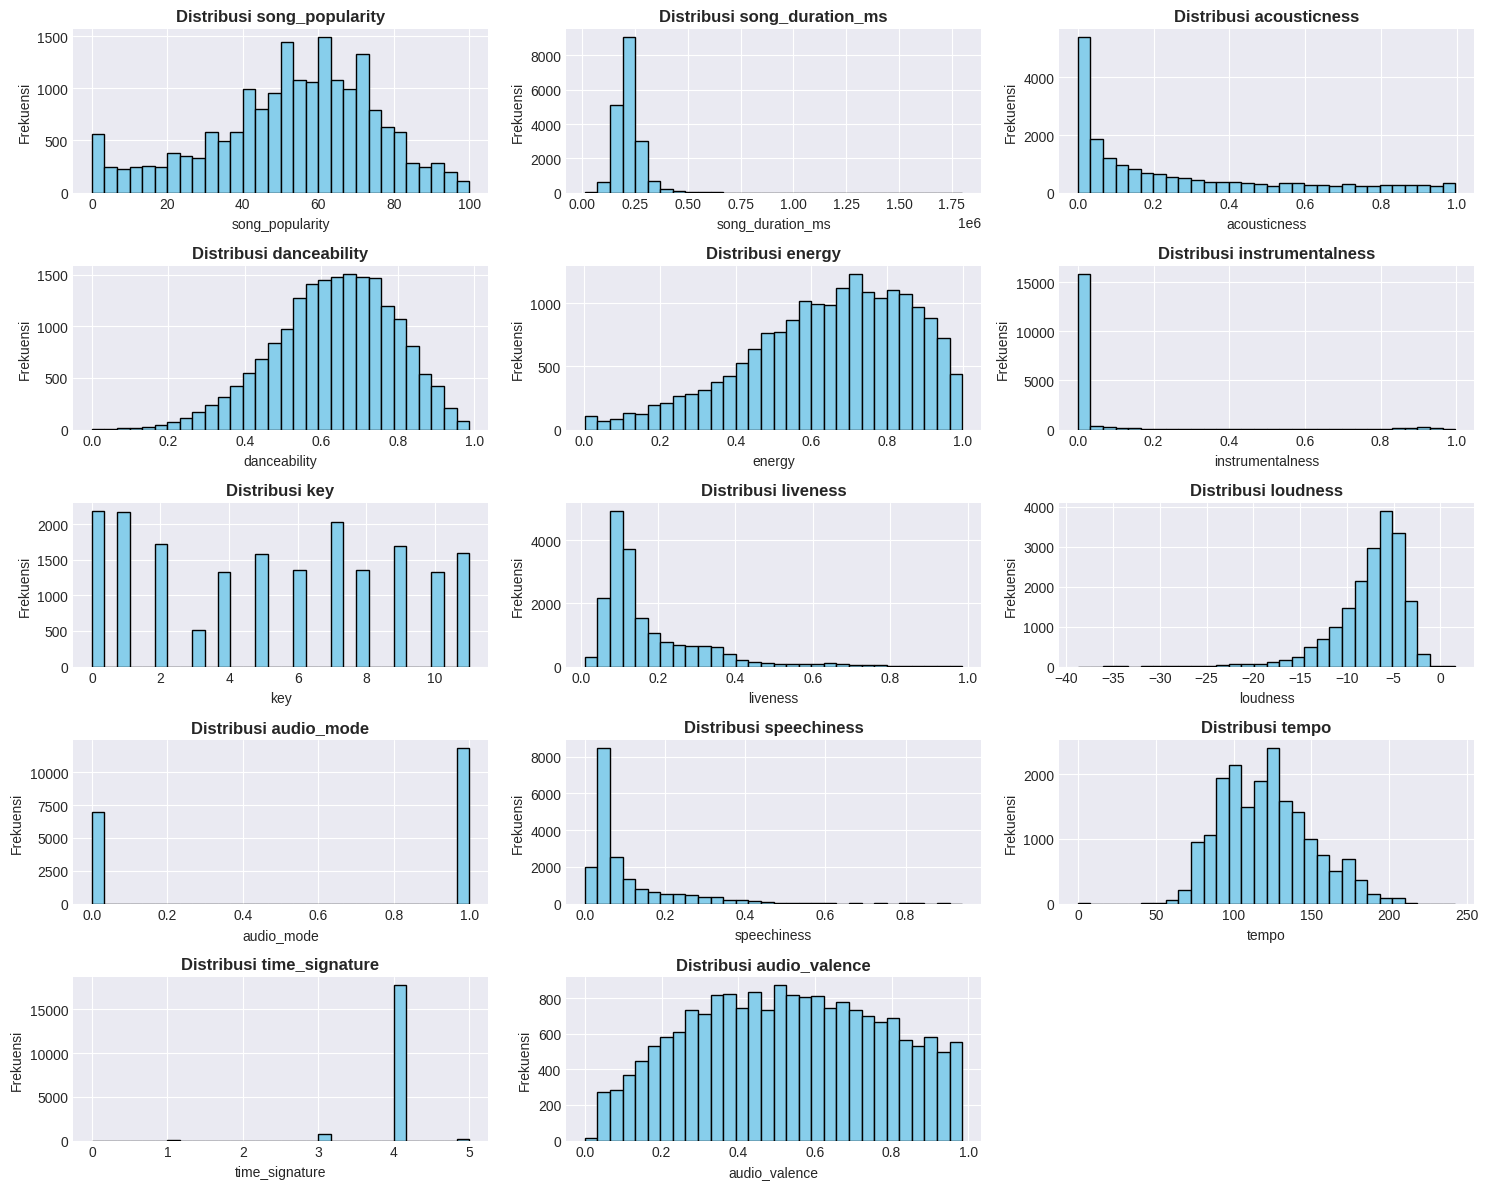

✅ Histogram fitur berhasil disimpan sebagai 'histogram_fitur.png'


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Pastikan df sudah ada dan berisi data numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Kolom numerik: {numeric_cols}")

# Membuat grid subplot
fig, axes = plt.subplots(nrows=(len(numeric_cols)//3)+1, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Membuat histogram untuk setiap kolom numerik
for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribusi {col}', fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

# Hapus subplot kosong jika ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Simpan hasil ke file gambar
plt.savefig("histogram_fitur.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ Histogram fitur berhasil disimpan sebagai 'histogram_fitur.png'")


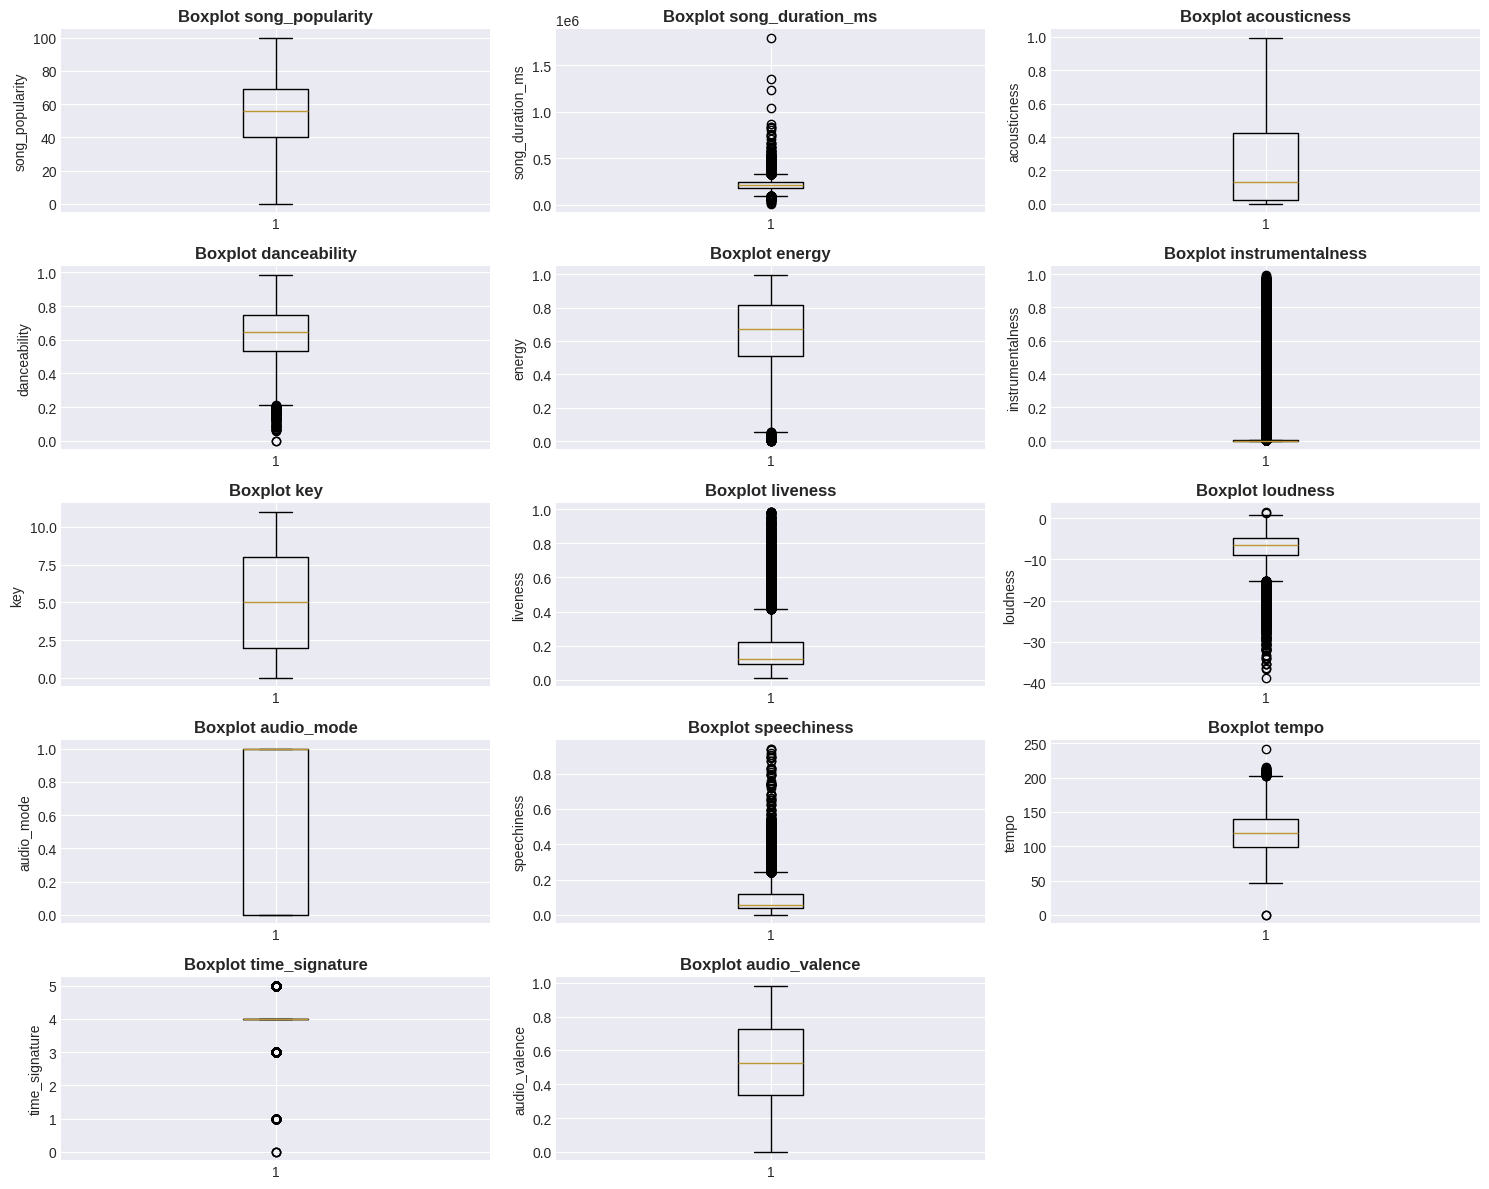

In [ ]:
# Boxplot untuk deteksi outlier
fig, axes = plt.subplots(nrows=(len(numeric_cols)//3)+1, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df[col].dropna(), vert=True)
    axes[i].set_title(f'Boxplot {col}', fontweight='bold')
    axes[i].set_ylabel(col)

# Hapus subplot kosong
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

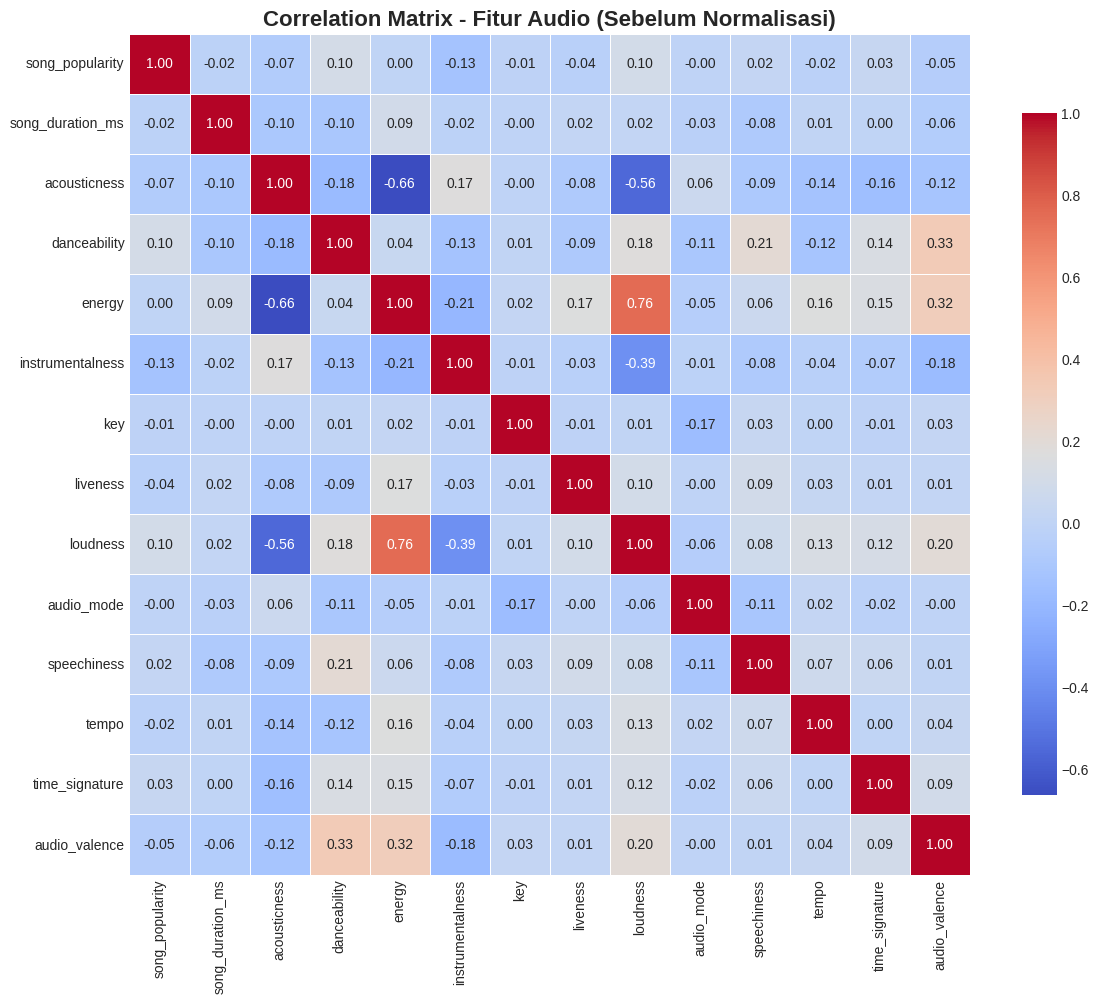

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# 1️⃣ Hitung korelasi untuk semua kolom numerik sebelum normalisasi
correlation_matrix = df[numeric_cols].corr()

# 2️⃣ Visualisasi correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Fitur Audio (Sebelum Normalisasi)', fontsize=16, fontweight='bold')
plt.tight_layout()

# 3️⃣ Simpan hasil visualisasi ke file
plt.savefig("correlation_matrix_before_normalization.png", dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
SELECTED_FEATURES = [
    'danceability',
    'energy',
    'audio_valence',
    'acousticness',
    'tempo',
    'instrumentalness',
    'speechiness',
    'loudness'
]

print("\n✅ FITUR YANG DIGUNAKAN (8 fitur):")
for i, feat in enumerate(SELECTED_FEATURES, 1):
    print(f"   {i}. {feat}")

# Filter dataframe hanya dengan fitur terpilih
df_features = df_normalized[SELECTED_FEATURES].copy()

print(f"\n📊 Shape data fitur: {df_features.shape}")
print(f"   - Jumlah lagu: {df_features.shape[0]}")
print(f"   - Jumlah fitur: {df_features.shape[1]}")

# Cek missing values
print(f"\n🔍 Missing values: {df_features.isnull().sum().sum()}")



✅ FITUR YANG DIGUNAKAN (8 fitur):
   1. danceability
   2. energy
   3. audio_valence
   4. acousticness
   5. tempo
   6. instrumentalness
   7. speechiness
   8. loudness

📊 Shape data fitur: (18835, 8)
   - Jumlah lagu: 18835
   - Jumlah fitur: 8

🔍 Missing values: 0


Total kolom numerik: 14


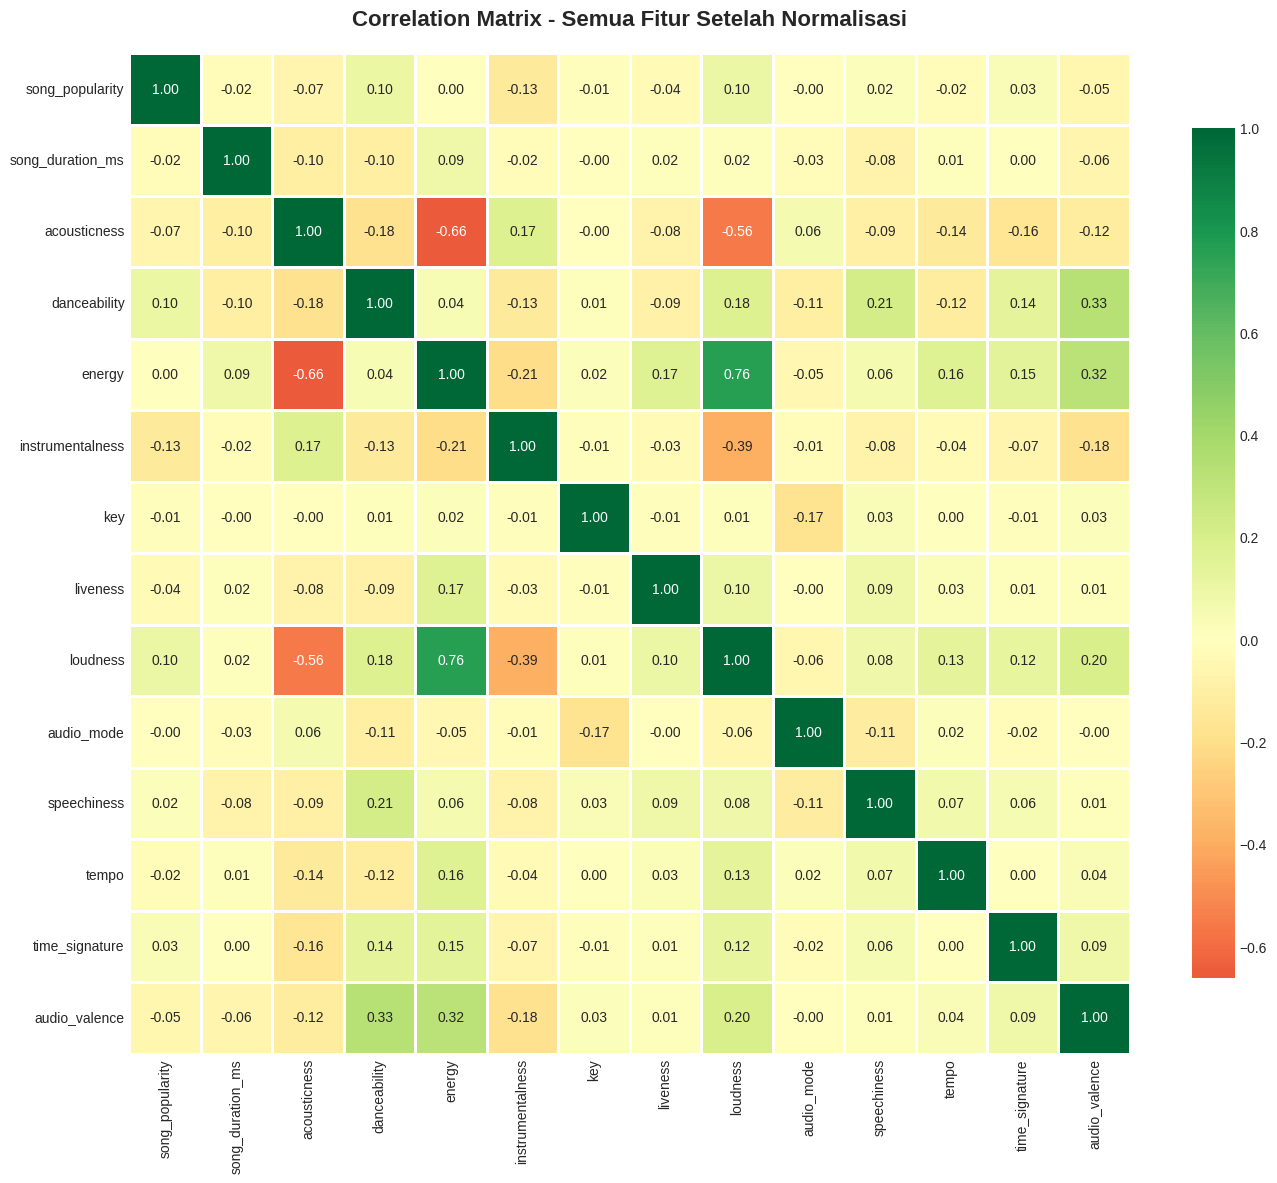

✅ Korelasi seluruh fitur setelah normalisasi berhasil dibuat dan disimpan sebagai 'correlation_matrix_all_normalized.png'


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1️⃣ Ambil semua kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Total kolom numerik: {len(numeric_cols)}")

# 2️⃣ Normalisasi seluruh kolom numerik
scaler = StandardScaler()
df_normalized_all = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

# 3️⃣ Hitung matriks korelasi
correlation_matrix_all = df_normalized_all.corr()

# 4️⃣ Visualisasi heatmap korelasi seluruh fitur
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix_all,
            annot=True,
            fmt='.2f',
            cmap='RdYlGn',
            center=0,
            square=True,
            linewidths=0.8,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Semua Fitur Setelah Normalisasi', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()

# 5️⃣ Simpan hasil ke file
plt.savefig("correlation_matrix_all_normalized.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ Korelasi seluruh fitur setelah normalisasi berhasil dibuat dan disimpan sebagai 'correlation_matrix_all_normalized.png'")


In [ ]:
import pandas as pd

# 1️⃣ Baca ulang dataset asli
df = pd.read_csv('song_data.csv')

print("Dataset asli dibaca!")
print(f"Jumlah baris awal: {len(df)}")

# 2️⃣ Hapus baris duplikat (berdasarkan semua kolom)
df_cleaned = df.drop_duplicates()

# 3️⃣ Tampilkan hasil
print("=" * 50)
print("✅ Duplikat Berhasil Dihapus")
print("=" * 50)
print(f"Jumlah baris setelah dibersihkan: {len(df_cleaned)}")
print(f"Jumlah baris yang dihapus: {len(df) - len(df_cleaned)}")

# 4️⃣ Simpan dataset bersih ke file baru
output_path = "song_data_cleaned.csv"
df_cleaned.to_csv(output_path, index=False)

print(f"\n📁 Dataset bersih telah disimpan sebagai: '{output_path}'")

# 5️⃣ (Opsional) Cek ulang apakah masih ada duplikat
duplicates_remaining = df_cleaned.duplicated().sum()
print(f"🔍 Sisa duplikat setelah pembersihan: {duplicates_remaining}")


Dataset asli dibaca!
Jumlah baris awal: 18835
✅ Duplikat Berhasil Dihapus
Jumlah baris setelah dibersihkan: 14926
Jumlah baris yang dihapus: 3909

📁 Dataset bersih telah disimpan sebagai: 'song_data_cleaned.csv'
🔍 Sisa duplikat setelah pembersihan: 0


In [43]:
import pandas as pd

# 1️⃣ Baca dataset asli
df = pd.read_csv('song_data_cleaned.csv')

# 2️⃣ Kolom yang dipakai model (fitur KNN)
FEATURES = [
    'danceability',
    'energy',
    'audio_valence',
    'acousticness',
    'tempo',
    'instrumentalness',
    'speechiness',
    'loudness'
]

# 3️⃣ Filter dataset agar hanya menyisakan kolom yang dibutuhkan
df_filtered = df[FEATURES]

# 4️⃣ Simpan hasilnya ke file baru
df_filtered.to_csv('song_data_knn_features.csv', index=False)

print("✅ Dataset berhasil difilter hanya untuk kolom fitur KNN dan disimpan ke 'song_data_knn_features.csv'")


✅ Dataset berhasil difilter hanya untuk kolom fitur KNN dan disimpan ke 'song_data_knn_features.csv'


In [44]:

print("\n" + "="*80)
print("🤖 TRAINING MODEL KNN")
print("="*80)

# Parameter KNN - PERBEDAAN: K lebih besar untuk diversity
N_NEIGHBORS_POOL = 30
METRIC = 'euclidean'

# Inisialisasi dan training model
knn_model = NearestNeighbors(
    n_neighbors=N_NEIGHBORS_POOL,
    metric=METRIC,
    algorithm='auto',
    n_jobs=-1
)

print(f"\n⚙️  Parameter Model:")
print(f"   - Algorithm: KNN (K-Nearest Neighbors)")
print(f"   - K (neighbor pool): {N_NEIGHBORS_POOL}")
print(f"   - Distance metric: {METRIC}")
print(f"   - Features: {len(SELECTED_FEATURES)}")

# Fit model
print("\n⏳ Training model...")
knn_model.fit(df_features)
print("✅ Model berhasil di-training!")


🤖 TRAINING MODEL KNN

⚙️  Parameter Model:
   - Algorithm: KNN (K-Nearest Neighbors)
   - K (neighbor pool): 30
   - Distance metric: euclidean
   - Features: 8

⏳ Training model...
✅ Model berhasil di-training!


In [45]:
def calculate_diversity_score(candidate_features, selected_features_list):
    """
    Hitung diversity score: seberapa berbeda candidate dengan yang sudah dipilih
    """
    if len(selected_features_list) == 0:
        return 0

    distances = []
    for selected_feat in selected_features_list:
        dist = np.linalg.norm(candidate_features - selected_feat)
        distances.append(dist)

    return np.mean(distances)


def get_hybrid_recommendations_fixed(song_name, df_original, df_features, model,
                                     n_recommendations=10, diversity_weight=0.3):


    # Cari index lagu (case-insensitive)
    song_indices = df_original[df_original['song_name'].str.lower() == song_name.lower()].index

    if len(song_indices) == 0:
        print(f"❌ Lagu '{song_name}' tidak ditemukan!")
        # Cari lagu dengan nama mirip
        similar = df_original[df_original['song_name'].str.contains(song_name, case=False, na=False)]
        if len(similar) > 0:
            print(f"\n💡 Mungkin maksud Anda:")
            for idx, row in similar.head(5).iterrows():
                print(f"   - {row['song_name']}")
        return None

    song_idx = song_indices[0]
    input_song_name = df_original.iloc[song_idx]['song_name']

    # Ambil fitur lagu
    song_features = df_features.iloc[song_idx].values.reshape(1, -1)

    # Cari neighbors (ambil pool yang lebih besar untuk antisipasi duplikat)
    # Ambil 2x lebih banyak untuk buffer duplikat
    pool_size = min(n_recommendations * 3, len(df_features) - 1)
    distances, indices = model.kneighbors(song_features, n_neighbors=pool_size + 1)

    # Buat candidate pool (skip index 0 = lagu itu sendiri)
    candidates = []
    seen_songs = set()  # ✅ Track lagu yang sudah ada
    seen_songs.add(input_song_name.lower())  # ✅ Tambahkan input song

    for i in range(1, len(indices[0])):
        idx = indices[0][i]
        candidate_song_name = df_original.iloc[idx]['song_name']

        # ✅ SKIP JIKA DUPLIKAT (case-insensitive comparison)
        if candidate_song_name.lower() in seen_songs:
            continue

        seen_songs.add(candidate_song_name.lower())

        dist = distances[0][i]
        similarity = 1 / (1 + dist)

        candidates.append({
            'idx': idx,
            'song_name': candidate_song_name,
            'similarity': similarity,
            'distance': dist,
            'features': df_features.iloc[idx].values
        })

    # HYBRID SELECTION dengan Maximal Marginal Relevance (MMR)
    selected = []
    selected_features = []
    remaining = candidates.copy()

    for _ in range(n_recommendations):
        if len(remaining) == 0:
            break

        best_score = -1
        best_candidate = None
        best_idx = -1

        for i, candidate in enumerate(remaining):
            # Hitung similarity score
            sim_score = candidate['similarity']

            # Hitung diversity score
            div_score = calculate_diversity_score(
                candidate['features'],
                selected_features
            )

            # Normalize diversity score (0-1)
            if len(selected_features) > 0:
                div_score = min(div_score / 0.5, 1.0)
            else:
                div_score = 0

            # Hybrid score: weighted combination
            final_score = (1 - diversity_weight) * sim_score + diversity_weight * div_score

            if final_score > best_score:
                best_score = final_score
                best_candidate = candidate
                best_idx = i

        # Tambahkan ke hasil
        if best_candidate:
            best_candidate['diversity_score'] = calculate_diversity_score(
                best_candidate['features'],
                selected_features
            )
            best_candidate['final_score'] = best_score
            selected.append(best_candidate)
            selected_features.append(best_candidate['features'])
            remaining.pop(best_idx)

    # Format hasil
    recommendations = []
    for i, rec in enumerate(selected, 1):
        recommendations.append({
            'rank': i,
            'song_name': rec['song_name'],
            'similarity_score': rec['similarity'],
            'diversity_score': rec['diversity_score'],
            'final_score': rec['final_score'],
            'distance': rec['distance']
        })

    return pd.DataFrame(recommendations)

In [46]:

print("\n" + "="*80)
print("🎧 TESTING SISTEM REKOMENDASI")
print("="*80)

test_song = "Boulevard of Broken Dreams"
print(f"\n🎵 Input Lagu: {test_song}")

# Test Hybrid dengan diversity_weight = 0.3
print("\n" + "-"*80)
print(" Hybrid KNN (diversity_weight = 0.3)")
print("-"*80)
hybrid_recs = get_hybrid_recommendations_fixed(
    song_name=test_song,
    df_original=df_normalized,
    df_features=df_features,
    model=knn_model,
    n_recommendations=10,
    diversity_weight=0.3
)

if hybrid_recs is not None:
    print("\n📋 Top 10 Rekomendasi:")
    display_cols = ['rank', 'song_name', 'similarity_score', 'diversity_score', 'final_score']
    print(hybrid_recs[display_cols].to_string(index=False))
    print(f"\n📊 Avg Similarity: {hybrid_recs['similarity_score'].mean():.4f}")
    print(f"📊 Avg Diversity: {hybrid_recs['diversity_score'].mean():.4f}")



🎧 TESTING SISTEM REKOMENDASI

🎵 Input Lagu: Boulevard of Broken Dreams

--------------------------------------------------------------------------------
 Hybrid KNN (diversity_weight = 0.3)
--------------------------------------------------------------------------------

📋 Top 10 Rekomendasi:
 rank           song_name  similarity_score  diversity_score  final_score
    1         Where U Are          0.934319         0.000000     0.654023
    2            The Gold          0.874997         0.191299     0.727277
    3      Heartbeat Song          0.878831         0.187275     0.727547
    4           Fireflies          0.913214         0.144958     0.726224
    5 My Only True Friend          0.891714         0.158601     0.719361
    6            Up We Go          0.877383         0.179301     0.721749
    7       Superposition          0.893930         0.165415     0.725000
    8    Follow Your Fire          0.890488         0.163995     0.721739
    9               Swing          0.90

In [47]:

print("\n" + "="*80)
print("📈 EVALUASI KOMPREHENSIF")
print("="*80)

def evaluate_system(df_original, df_features, model, method='hybrid',
                   n_test_songs=100, n_recommendations=10, diversity_weight=0.3):
    """
    Evaluasi sistem dengan berbagai metrics
    """
    test_indices = np.random.choice(len(df_original), n_test_songs, replace=False)

    all_similarities = []
    all_diversities = []
    all_recommendations = set()
    artist_diversity = []

    print(f"\n⏳ Mengevaluasi {n_test_songs} lagu dengan metode '{method}'...")

    for idx in test_indices:
        song_name = df_original.iloc[idx]['song_name']

        if method == 'hybrid':
            recs = get_hybrid_recommendations_fixed(
                song_name=song_name,
                df_original=df_original,
                df_features=df_features,
                model=model,
                n_recommendations=n_recommendations,
                diversity_weight=diversity_weight
            )
            if recs is not None:
                all_diversities.extend(recs['diversity_score'].tolist())
        else:
            recs = get_hybrid_recommendations_fixed(
                song_name=song_name,
                df_original=df_original,
                df_features=df_features,
                model=model,
                n_recommendations=n_recommendations
            )

        if recs is not None:
            all_similarities.extend(recs['similarity_score'].tolist())
            all_recommendations.update(recs['song_name'].tolist())

    results = {
        'method': method,
        'avg_similarity': np.mean(all_similarities),
        'std_similarity': np.std(all_similarities),
        'min_similarity': np.min(all_similarities),
        'max_similarity': np.max(all_similarities),
        'coverage': len(all_recommendations) / len(df_original) * 100,
        'unique_recommendations': len(all_recommendations)
    }

    if method == 'hybrid' and all_diversities:
        results['avg_diversity'] = np.mean(all_diversities)
        results['std_diversity'] = np.std(all_diversities)

    return results

# Evaluasi Pure KNN
print("\n🔵 Evaluasi Pure KNN...")
pure_eval = evaluate_system(
    df_original=df_normalized,
    df_features=df_features,
    model=knn_model,
    method='pure',
    n_test_songs=100,
    n_recommendations=10
)

# Evaluasi Hybrid dengan diversity_weight = 0.3
print("\n🟢 Evaluasi Hybrid (diversity_weight=0.3)...")
hybrid_eval = evaluate_system(
    df_original=df_normalized,
    df_features=df_features,
    model=knn_model,
    method='hybrid',
    n_test_songs=100,
    n_recommendations=10,
    diversity_weight=0.3
)


📈 EVALUASI KOMPREHENSIF

🔵 Evaluasi Pure KNN...

⏳ Mengevaluasi 100 lagu dengan metode 'pure'...

🟢 Evaluasi Hybrid (diversity_weight=0.3)...

⏳ Mengevaluasi 100 lagu dengan metode 'hybrid'...


In [48]:

diversity_weights = [0.1, 0.2, 0.3, 0.4, 0.5]
print("\n⏳ Testing dengan berbagai diversity weight...")
print("(Menggunakan 30 test songs untuk speed)")

weight_results = []
for weight in diversity_weights:
    eval_result = evaluate_system(
        df_original=df_normalized,
        df_features=df_features,
        model=knn_model,
        method='hybrid',
        n_test_songs=30,
        n_recommendations=10,
        diversity_weight=weight
    )
    weight_results.append({
        'diversity_weight': weight,
        'avg_similarity': eval_result['avg_similarity'],
        'coverage': eval_result['coverage'],
        'unique_recs': eval_result['unique_recommendations']
    })

print("\n📊 Hasil Testing Diversity Weight:")
print("-" * 80)
print(f"{'Weight':<10} {'Avg Similarity':<18} {'Coverage':<15} {'Unique Songs':<15}")
print("-" * 80)
for result in weight_results:
    print(f"{result['diversity_weight']:<10.1f} "
          f"{result['avg_similarity']:.4f} ({result['avg_similarity']*100:.1f}%){'':<5} "
          f"{result['coverage']:.2f}%{'':<9} "
          f"{result['unique_recs']}")

print("\n💡 REKOMENDASI DIVERSITY WEIGHT:")
print("   • 0.1-0.2: Prioritas similarity (untuk genre yang sangat specific)")
print("   • 0.3-0.4: ⭐ BALANCED (recommended untuk most cases)")
print("   • 0.5+:    Prioritas diversity (untuk eksplorasi musik baru)")

print("\n✅ PROSES SELESAI!")
print("="*80)


⏳ Testing dengan berbagai diversity weight...
(Menggunakan 30 test songs untuk speed)

⏳ Mengevaluasi 30 lagu dengan metode 'hybrid'...

⏳ Mengevaluasi 30 lagu dengan metode 'hybrid'...

⏳ Mengevaluasi 30 lagu dengan metode 'hybrid'...

⏳ Mengevaluasi 30 lagu dengan metode 'hybrid'...

⏳ Mengevaluasi 30 lagu dengan metode 'hybrid'...

📊 Hasil Testing Diversity Weight:
--------------------------------------------------------------------------------
Weight     Avg Similarity     Coverage        Unique Songs   
--------------------------------------------------------------------------------
0.1        0.8904 (89.0%)      1.58%          297
0.2        0.8784 (87.8%)      1.56%          294
0.3        0.8882 (88.8%)      1.57%          295
0.4        0.8705 (87.1%)      1.58%          297
0.5        0.8516 (85.2%)      1.59%          299

💡 REKOMENDASI DIVERSITY WEIGHT:
   • 0.1-0.2: Prioritas similarity (untuk genre yang sangat specific)
   • 0.3-0.4: ⭐ BALANCED (recommended untuk most ca

In [49]:
def calculate_diversity_score(candidate_features, selected_features_list):

    if len(selected_features_list) == 0:
        return 0

    distances = []
    for selected_feat in selected_features_list:
        dist = np.linalg.norm(candidate_features - selected_feat)
        distances.append(dist)

    return np.mean(distances)

def get_hybrid_recommendations(song_name, df_original, df_features, model,
                               n_recommendations=10, diversity_weight=0.3):

    # Cari index lagu (case-insensitive)
    song_indices = df_original[df_original['song_name'].str.lower() == song_name.lower()].index

    if len(song_indices) == 0:
        print(f"❌ Lagu '{song_name}' tidak ditemukan!")
        # Cari lagu dengan nama mirip
        similar = df_original[df_original['song_name'].str.contains(song_name, case=False, na=False)]
        if len(similar) > 0:
            print(f"\n💡 Mungkin maksud Anda:")
            for idx, row in similar.head(5).iterrows():
                print(f"   - {row['song_name']}")
        return None

    song_idx = song_indices[0]
    input_song_name = df_original.iloc[song_idx]['song_name']

    # Ambil fitur lagu
    song_features = df_features.iloc[song_idx].values.reshape(1, -1)

    # Cari neighbors (ambil pool 3x lebih banyak untuk buffer duplikat)
    pool_size = min(n_recommendations * 3, len(df_features) - 1)
    distances, indices = model.kneighbors(song_features, n_neighbors=pool_size + 1)

    # ✅ DUPLICATE REMOVAL: Track lagu yang sudah ada
    candidates = []
    seen_songs = set()
    seen_songs.add(input_song_name.lower())  # Tambahkan input song

    for i in range(1, len(indices[0])):
        idx = indices[0][i]
        candidate_song_name = df_original.iloc[idx]['song_name']

        # ✅ SKIP JIKA DUPLIKAT (case-insensitive)
        if candidate_song_name.lower() in seen_songs:
            continue

        seen_songs.add(candidate_song_name.lower())

        dist = distances[0][i]
        similarity = 1 / (1 + dist)

        candidates.append({
            'idx': idx,
            'song_name': candidate_song_name,
            'similarity': similarity,
            'distance': dist,
            'features': df_features.iloc[idx].values
        })

    # HYBRID SELECTION dengan MMR (Maximal Marginal Relevance)
    selected = []
    selected_features = []
    remaining = candidates.copy()

    for _ in range(n_recommendations):
        if len(remaining) == 0:
            break

        best_score = -1
        best_candidate = None
        best_idx = -1

        for i, candidate in enumerate(remaining):
            # Hitung similarity score
            sim_score = candidate['similarity']

            # Hitung diversity score
            div_score = calculate_diversity_score(
                candidate['features'],
                selected_features
            )

            # Normalize diversity score (0-1)
            if len(selected_features) > 0:
                div_score = min(div_score / 0.5, 1.0)
            else:
                div_score = 0

            # Hybrid score: weighted combination
            final_score = (1 - diversity_weight) * sim_score + diversity_weight * div_score

            if final_score > best_score:
                best_score = final_score
                best_candidate = candidate
                best_idx = i

        # Tambahkan ke hasil
        if best_candidate:
            best_candidate['diversity_score'] = calculate_diversity_score(
                best_candidate['features'],
                selected_features
            )
            best_candidate['final_score'] = best_score
            selected.append(best_candidate)
            selected_features.append(best_candidate['features'])
            remaining.pop(best_idx)

    # Format hasil
    recommendations = []
    for i, rec in enumerate(selected, 1):
        recommendations.append({
            'rank': i,
            'song_name': rec['song_name'],
            'similarity_score': rec['similarity'],
            'diversity_score': rec['diversity_score'],
            'final_score': rec['final_score'],
            'distance': rec['distance']
        })

    return pd.DataFrame(recommendations)



In [50]:
def test_duplicate_removal():

    print("\n" + "="*80)
    print("🧪 TESTING: DUPLICATE REMOVAL")
    print("="*80)

    test_songs = ["Where U Are", "Boulevard of Broken Dreams", "Fireflies"]

    all_passed = True

    for song in test_songs:
        print(f"\n🎵 Testing: {song}")
        print("-" * 80)

        recs = get_hybrid_recommendations(
            song_name=song,
            df_original=df_normalized,
            df_features=df_features,
            model=knn_model,
            n_recommendations=10,
            diversity_weight=0.3
        )

        if recs is not None:
            # Check duplicates
            unique_count = recs['song_name'].nunique()
            total_count = len(recs)

            print(f"📊 Total recommendations: {total_count}")
            print(f"📊 Unique songs: {unique_count}")

            if unique_count == total_count:
                print(f"✅ PASSED: No duplicates!")
            else:
                print(f"❌ FAILED: Found {total_count - unique_count} duplicates!")
                all_passed = False
                # Show duplicates
                duplicates = recs[recs['song_name'].duplicated(keep=False)]
                print("\n⚠️  Duplicate songs:")
                print(duplicates[['rank', 'song_name', 'similarity_score']])

            print("\nTop 5 recommendations:")
            for _, row in recs.head(5).iterrows():
                print(f"   {row['rank']}. {row['song_name']} ({row['similarity_score']:.3f})")
        else:
            print("⚠️  No recommendations returned")

    # Overall result
    print("\n" + "="*80)
    if all_passed:
        print("🎉 ALL TESTS PASSED! No duplicates found.")
    else:
        print("⚠️  Some tests failed. Please review above.")
    print("="*80)

In [51]:
def interactive_recommendation():

    print("\n" + "="*80)
    print("🎵 SISTEM REKOMENDASI LAGU INTERAKTIF")
    print("="*80)
    print("✅ Version: Hybrid KNN with Duplicate Removal")
    print("📊 Features: 8 audio features, diversity_weight=0.3")

    while True:
        song_input = input("\n🎧 Masukkan nama lagu (atau 'exit' untuk keluar): ").strip()

        if song_input.lower() == 'exit':
            print("\n👋 Terima kasih telah menggunakan sistem rekomendasi!")
            break

        if not song_input:
            print("❌ Nama lagu tidak boleh kosong!")
            continue

        # Get recommendations
        recs = get_hybrid_recommendations(
            song_name=song_input,
            df_original=df_normalized,
            df_features=df_features,
            model=knn_model,
            n_recommendations=10,
            diversity_weight=0.3
        )

        if recs is not None:
            print("\n📋 Rekomendasi untuk Anda:")

            # Verifikasi tidak ada duplikat
            unique_songs = recs['song_name'].nunique()
            total_songs = len(recs)

            for _, row in recs.iterrows():
                print(f"   {row['rank']}. {row['song_name']} (similarity: {row['similarity_score']:.3f})")

            # Show statistics
            print(f"\n📊 Stats: {total_songs} rekomendasi, {unique_songs} unique songs")
            if unique_songs < total_songs:
                print(f"   ⚠️  WARNING: Ada {total_songs - unique_songs} duplikat!")
            else:
                print(f"   ✅ Semua rekomendasi unik!")

            # Show avg similarity and diversity
            avg_sim = recs['similarity_score'].mean()
            avg_div = recs['diversity_score'].mean()
            print(f"   📈 Avg Similarity: {avg_sim:.3f}")
            print(f"   🎨 Avg Diversity: {avg_div:.3f}")

In [52]:
def quick_test(song_name="Where U Are", n=10):

    print(f"\n🎵 Quick Test: {song_name}")
    print("-" * 80)

    recs = get_hybrid_recommendations(
        song_name=song_name,
        df_original=df_normalized,
        df_features=df_features,
        model=knn_model,
        n_recommendations=n,
        diversity_weight=0.3
    )

    if recs is not None:
        print("\n📋 Recommendations:")
        for _, row in recs.iterrows():
            print(f"   {row['rank']}. {row['song_name']} ({row['similarity_score']:.3f})")

        # Stats
        unique = recs['song_name'].nunique()
        total = len(recs)
        print(f"\n📊 {unique}/{total} unique songs")
        if unique == total:
            print("✅ No duplicates!")
        else:
            print(f"❌ {total - unique} duplicates found!")

In [53]:
if __name__ == "__main__":
    print("="*80)
    print("🔧 HYBRID KNN - DUPLICATE REMOVAL (FIXED VERSION)")
    print("="*80)

    # Pastikan variabel sudah ada
    try:
        # Check if variables exist
        df_normalized
        df_features
        knn_model
        print("✅ All required variables found!")

        # Run tests
        print("\n" + "="*80)
        print("📝 Running Tests...")
        print("="*80)

        # Test 1: Duplicate removal
        test_duplicate_removal()

        # Test 2: Quick test
        print("\n" + "="*80)
        print("📝 Quick Test Example")
        print("="*80)
        quick_test("Blinding Lights")

        print("\n" + "="*80)
        print("✅ SETUP COMPLETE!")
        print("="*80)
        print("\n📝 Cara menggunakan:")
        print("   1. interactive_recommendation()  - Mode interaktif")
        print("   2. quick_test('Song Name')      - Test cepat")
        print("   3. test_duplicate_removal()     - Full testing")

    except NameError as e:
        print(f"\n❌ ERROR: {e}")
        print("\n⚠️  Pastikan Anda sudah menjalankan:")
        print("   1. Load data (df_normalized)")
        print("   2. Feature selection (df_features)")
        print("   3. Train model (knn_model)")
        print("\n💡 Jalankan cell sebelumnya terlebih dahulu!")

🔧 HYBRID KNN - DUPLICATE REMOVAL (FIXED VERSION)
✅ All required variables found!

📝 Running Tests...

🧪 TESTING: DUPLICATE REMOVAL

🎵 Testing: Where U Are
--------------------------------------------------------------------------------
📊 Total recommendations: 10
📊 Unique songs: 10
✅ PASSED: No duplicates!

Top 5 recommendations:
   1. Boulevard of Broken Dreams (0.934)
   2. Invitation (0.884)
   3. The Chain - 2004 Remastered Edition (0.884)
   4. Party In The U.S.A. (0.873)
   5. Superposition (0.928)

🎵 Testing: Boulevard of Broken Dreams
--------------------------------------------------------------------------------
📊 Total recommendations: 10
📊 Unique songs: 10
✅ PASSED: No duplicates!

Top 5 recommendations:
   1. Where U Are (0.934)
   2. The Gold (0.875)
   3. Heartbeat Song (0.879)
   4. Fireflies (0.913)
   5. My Only True Friend (0.892)

🎵 Testing: Fireflies
--------------------------------------------------------------------------------
📊 Total recommendations: 10
📊 Uniqu

In [ ]:
print(" EVALUASI PRECISION & RECALL")


def calculate_precision_recall(df_original, df_features, model,
                               n_test_songs=50, n_recommendations=10,
                               similarity_threshold=0.8):

    test_indices = np.random.choice(len(df_original), n_test_songs, replace=False)

    precisions = []
    recalls = []
    f1_scores = []

    print(f"\n⏳ Mengevaluasi {n_test_songs} lagu...")
    print(f"   Threshold relevansi: similarity > {similarity_threshold}")

    for idx in test_indices:
        song_name = df_original.iloc[idx]['song_name']

        # Get recommendations
        recs = get_hybrid_recommendations(
            song_name=song_name,
            df_original=df_original,
            df_features=df_features,
            model=model,
            n_recommendations=n_recommendations,
            diversity_weight=0.3
        )

        if recs is not None:
            # Hitung precision
            relevant_recs = (recs['similarity_score'] > similarity_threshold).sum()
            precision = relevant_recs / n_recommendations
            precisions.append(precision)

            # Untuk recall, kita perlu tahu total item relevan
            # Kita gunakan top-50 neighbors sebagai ground truth
            song_features = df_features.iloc[idx].values.reshape(1, -1)
            distances, indices = model.kneighbors(song_features, n_neighbors=51)

            # Hitung berapa banyak yang truly relevant (similarity > threshold)
            all_similarities = [1 / (1 + distances[0][i]) for i in range(1, 51)]
            total_relevant = sum(1 for sim in all_similarities if sim > similarity_threshold)

            if total_relevant > 0:
                recall = relevant_recs / total_relevant
                recalls.append(recall)

                # F1 Score
                if precision + recall > 0:
                    f1 = 2 * (precision * recall) / (precision + recall)
                    f1_scores.append(f1)

    return {
        'avg_precision': np.mean(precisions),
        'std_precision': np.std(precisions),
        'avg_recall': np.mean(recalls) if recalls else 0,
        'std_recall': np.std(recalls) if recalls else 0,
        'avg_f1': np.mean(f1_scores) if f1_scores else 0,
        'std_f1': np.std(f1_scores) if f1_scores else 0
    }

# Evaluasi dengan threshold berbeda
thresholds = [0.75, 0.80, 0.85, 0.90]
pr_results = []

for threshold in thresholds:
    print(f"\n🔍 Testing dengan threshold = {threshold}")
    result = calculate_precision_recall(
        df_original=df_normalized,
        df_features=df_features,
        model=knn_model,
        n_test_songs=50,
        n_recommendations=10,
        similarity_threshold=threshold
    )
    result['threshold'] = threshold
    pr_results.append(result)

print("\n📊 HASIL PRECISION & RECALL:")
print("-"*90)
print(f"{'Threshold':<12} {'Precision':<20} {'Recall':<20} {'F1-Score':<20}")
print("-"*90)
for result in pr_results:
    print(f"{result['threshold']:<12.2f} "
          f"{result['avg_precision']:.4f} ± {result['std_precision']:.4f}{'':<6} "
          f"{result['avg_recall']:.4f} ± {result['std_recall']:.4f}{'':<6} "
          f"{result['avg_f1']:.4f} ± {result['std_f1']:.4f}")

 EVALUASI PRECISION & RECALL

🔍 Testing dengan threshold = 0.75

⏳ Mengevaluasi 50 lagu...
   Threshold relevansi: similarity > 0.75

🔍 Testing dengan threshold = 0.8

⏳ Mengevaluasi 50 lagu...
   Threshold relevansi: similarity > 0.8

🔍 Testing dengan threshold = 0.85

⏳ Mengevaluasi 50 lagu...
   Threshold relevansi: similarity > 0.85

🔍 Testing dengan threshold = 0.9

⏳ Mengevaluasi 50 lagu...
   Threshold relevansi: similarity > 0.9

📊 HASIL PRECISION & RECALL:
------------------------------------------------------------------------------------------
Threshold    Precision            Recall               F1-Score            
------------------------------------------------------------------------------------------
0.75         1.0000 ± 0.0000       0.2000 ± 0.0000       0.3333 ± 0.0000
0.80         0.9300 ± 0.2062       0.2286 ± 0.0935       0.3539 ± 0.0771
0.85         0.8080 ± 0.3097       0.3352 ± 0.3199       0.3689 ± 0.1635
0.90         0.3500 ± 0.3263       0.6337 ± 0.6096   

In [ ]:
print("\n" + "="*90)
print("NDCG (Normalized Discounted Cumulative Gain)")
print("="*90)

import numpy as np
import pandas as pd


def calculate_dcg(relevances, k=10):
    """
    DCG = sum(rel_i / log2(i+1)) untuk i = 1..k
    """
    dcg = 0.0
    for i, rel in enumerate(relevances[:k], 1):
        dcg += rel / np.log2(i + 1)
    return dcg



def calculate_ndcg(df_original, df_features, model, n_test_songs=50, k=10):
    """
    Hitung rata-rata NDCG@k untuk sejumlah lagu acak
    """
    test_indices = np.random.choice(len(df_original), n_test_songs, replace=False)
    ndcg_scores = []

    print(f"\n⏳ Menghitung NDCG untuk {n_test_songs} lagu (top-{k})...")

    for idx in test_indices:
        song_name = df_original.iloc[idx]['song_name']

        # Ambil rekomendasi dari sistem hybrid
        recs = get_hybrid_recommendations(
            song_name=song_name,
            df_original=df_original,
            df_features=df_features,
            model=model,
            n_recommendations=k,
            diversity_weight=0.3
        )

        if recs is not None and not recs.empty:
            # Relevance = similarity_score (karena sudah 0-1)
            relevances = recs['similarity_score'].tolist()

            # DCG dari hasil rekomendasi
            dcg = calculate_dcg(relevances, k)

            # IDCG (Ideal DCG) = DCG jika ranking sempurna (urut dari tertinggi)
            ideal_relevances = sorted(relevances, reverse=True)
            idcg = calculate_dcg(ideal_relevances, k)

            # NDCG
            if idcg > 0:
                ndcg = dcg / idcg
                ndcg_scores.append(ndcg)

    # Hasil rata-rata & statistik
    return {
        'avg_ndcg': np.mean(ndcg_scores) if len(ndcg_scores) > 0 else 0,
        'std_ndcg': np.std(ndcg_scores) if len(ndcg_scores) > 0 else 0,
        'min_ndcg': np.min(ndcg_scores) if len(ndcg_scores) > 0 else 0,
        'max_ndcg': np.max(ndcg_scores) if len(ndcg_scores) > 0 else 0
    }


k_values = [5, 10, 15, 20]
ndcg_results = []

for k in k_values:
    print(f"\n🔍 Calculating NDCG@{k}...")
    result = calculate_ndcg(
        df_original=df_normalized,
        df_features=df_features,
        model=knn_model,
        n_test_songs=50,
        k=k
    )
    result['k'] = k
    ndcg_results.append(result)


print("\n📊 HASIL NDCG (Normalized Discounted Cumulative Gain):")
print("-"*90)
print(f"{'k (top-k)':<12} {'Avg NDCG':<20} {'Std':<15} {'Range':<20}")
print("-"*90)
for result in ndcg_results:
    print(f"{result['k']:<12} "
          f"{result['avg_ndcg']:.4f}{'':<15} "
          f"{result['std_ndcg']:.4f}{'':<10} "
          f"[{result['min_ndcg']:.4f} - {result['max_ndcg']:.4f}]")

print("\n💡 INTERPRETASI NDCG:")
print("   • 0.90 - 1.00: 🟢 Excellent - Ranking sangat baik")
print("   • 0.80 - 0.90: ✅ Good - Ranking baik")
print("   • 0.70 - 0.80: ⚠️  Fair - Ranking cukup")
print("   • < 0.70:      ❌ Poor - Ranking buruk")

print("\n✅ Evaluasi NDCG selesai!")
print("="*90)



NDCG (Normalized Discounted Cumulative Gain)

🔍 Calculating NDCG@5...

⏳ Menghitung NDCG untuk 50 lagu (top-5)...

🔍 Calculating NDCG@10...

⏳ Menghitung NDCG untuk 50 lagu (top-10)...

🔍 Calculating NDCG@15...

⏳ Menghitung NDCG untuk 50 lagu (top-15)...

🔍 Calculating NDCG@20...

⏳ Menghitung NDCG untuk 50 lagu (top-20)...

📊 HASIL NDCG (Normalized Discounted Cumulative Gain):
------------------------------------------------------------------------------------------
k (top-k)    Avg NDCG             Std             Range               
------------------------------------------------------------------------------------------
5            0.9989                0.0009           [0.9965 - 1.0000]
10           0.9969                0.0018           [0.9921 - 0.9997]
15           0.9955                0.0028           [0.9858 - 0.9986]
20           0.9947                0.0028           [0.9851 - 0.9984]

💡 INTERPRETASI NDCG:
   • 0.90 - 1.00: 🟢 Excellent - Ranking sangat baik
   • 0.80 

In [ ]:
print("\n" + "="*90)
print("MAP (Mean Average Precision)")
print("="*90)

def calculate_map(df_original, df_features, model,
                 n_test_songs=50, k=10, similarity_threshold=0.8):
    """
    MAP mengukur rata-rata precision di berbagai titik recall
    """

    test_indices = np.random.choice(len(df_original), n_test_songs, replace=False)
    average_precisions = []

    print(f"\n⏳ Menghitung MAP untuk {n_test_songs} lagu...")

    for idx in test_indices:
        song_name = df_original.iloc[idx]['song_name']

        # Get recommendations
        recs = get_hybrid_recommendations(
            song_name=song_name,
            df_original=df_original,
            df_features=df_features,
            model=model,
            n_recommendations=k,
            diversity_weight=0.3
        )

        if recs is not None:
            relevant_count = 0
            precision_sum = 0.0

            for i, row in recs.iterrows():
                if row['similarity_score'] > similarity_threshold:
                    relevant_count += 1
                    precision_at_i = relevant_count / (i + 1)
                    precision_sum += precision_at_i

            if relevant_count > 0:
                avg_precision = precision_sum / relevant_count
                average_precisions.append(avg_precision)

    return {
        'map': np.mean(average_precisions) if average_precisions else 0,
        'std': np.std(average_precisions) if average_precisions else 0
    }

# Hitung MAP
map_result = calculate_map(
    df_original=df_normalized,
    df_features=df_features,
    model=knn_model,
    n_test_songs=50,
    k=10,
    similarity_threshold=0.8
)

print(f"\n📊 HASIL MAP@10:")
print("-"*90)
print(f"   Mean Average Precision: {map_result['map']:.4f} ± {map_result['std']:.4f}")

print("\n💡 INTERPRETASI MAP:")
if map_result['map'] >= 0.8:
    print("   🟢 EXCELLENT - Sistem menempatkan item relevan di posisi atas dengan konsisten")
elif map_result['map'] >= 0.6:
    print("   ✅ GOOD - Sistem cukup baik dalam ranking")
elif map_result['map'] >= 0.4:
    print("   ⚠️  FAIR - Ada room for improvement dalam ranking")
else:
    print("   ❌ POOR - Sistem perlu perbaikan signifikan")



MAP (Mean Average Precision)

⏳ Menghitung MAP untuk 50 lagu...

📊 HASIL MAP@10:
------------------------------------------------------------------------------------------
   Mean Average Precision: 0.9841 ± 0.0648

💡 INTERPRETASI MAP:
   🟢 EXCELLENT - Sistem menempatkan item relevan di posisi atas dengan konsisten


In [ ]:
print("\n" + "="*90)
print("INTRA-LIST DIVERSITY ANALYSIS")
print("="*90)

def calculate_intra_list_diversity(df_original, df_features, model, n_test_songs=50, k=10):
    """
    Mengukur seberapa berbeda item dalam satu list rekomendasi
    """

    test_indices = np.random.choice(len(df_original), n_test_songs, replace=False)
    diversity_scores = []

    print(f"\n⏳ Menganalisis diversity untuk {n_test_songs} lagu...")

    for idx in test_indices:
        song_name = df_original.iloc[idx]['song_name']

        recs = get_hybrid_recommendations(
            song_name=song_name,
            df_original=df_original,
            df_features=df_features,
            model=model,
            n_recommendations=k,
            diversity_weight=0.3
        )

        if recs is not None and len(recs) > 1:
            # Ambil fitur dari recommended songs
            rec_song_names = recs['song_name'].tolist()
            rec_indices = [df_original[df_original['song_name'] == name].index[0]
                          for name in rec_song_names if len(df_original[df_original['song_name'] == name]) > 0]

            if len(rec_indices) > 1:
                rec_features = df_features.iloc[rec_indices].values

                # Hitung rata-rata pairwise distance
                total_distance = 0
                pair_count = 0
                for i in range(len(rec_features)):
                    for j in range(i+1, len(rec_features)):
                        dist = np.linalg.norm(rec_features[i] - rec_features[j])
                        total_distance += dist
                        pair_count += 1

                if pair_count > 0:
                    avg_diversity = total_distance / pair_count
                    diversity_scores.append(avg_diversity)

    return {
        'avg_diversity': np.mean(diversity_scores),
        'std_diversity': np.std(diversity_scores),
        'min_diversity': np.min(diversity_scores),
        'max_diversity': np.max(diversity_scores)
    }

diversity_result = calculate_intra_list_diversity(
    df_original=df_normalized,
    df_features=df_features,
    model=knn_model,
    n_test_songs=50,
    k=10
)

print(f"\n📊 HASIL INTRA-LIST DIVERSITY:")
print("-"*90)
print(f"   Average Diversity: {diversity_result['avg_diversity']:.4f} ± {diversity_result['std_diversity']:.4f}")
print(f"   Range: [{diversity_result['min_diversity']:.4f} - {diversity_result['max_diversity']:.4f}]")

print("\n💡 INTERPRETASI:")
if diversity_result['avg_diversity'] < 0.15:
    print("   ⚠️  RENDAH - Rekomendasi terlalu mirip satu sama lain")
elif diversity_result['avg_diversity'] < 0.25:
    print("   ✅ BALANCED - Good mix of similarity and variety")
else:
    print("   🎨 TINGGI - Rekomendasi sangat bervariasi (mungkin kurang koheren)")


INTRA-LIST DIVERSITY ANALYSIS

⏳ Menganalisis diversity untuk 50 lagu...

📊 HASIL INTRA-LIST DIVERSITY:
------------------------------------------------------------------------------------------
   Average Diversity: 0.2382 ± 0.0904
   Range: [0.1010 - 0.5966]

💡 INTERPRETASI:
   ✅ BALANCED - Good mix of similarity and variety


In [42]:
interactive_recommendation()


🎵 SISTEM REKOMENDASI LAGU INTERAKTIF
✅ Version: Hybrid KNN with Duplicate Removal
📊 Features: 8 audio features, diversity_weight=0.3

🎧 Masukkan nama lagu (atau 'exit' untuk keluar): Be Legendary

📋 Rekomendasi untuk Anda:
   1. Rapture (similarity: 0.951)
   2. Dead! (similarity: 0.914)
   3. Aftergold (feat. Tove Styrke) (similarity: 0.917)
   4. Dr Feelgood (similarity: 0.914)
   5. GET UP (similarity: 0.912)
   6. Sham Pain (similarity: 0.948)
   7. Dr. Feelgood (similarity: 0.922)
   8. Circles (similarity: 0.908)
   9. Stupify (similarity: 0.916)
   10. Nightcall (similarity: 0.902)

📊 Stats: 10 rekomendasi, 10 unique songs
   ✅ Semua rekomendasi unik!
   📈 Avg Similarity: 0.920
   🎨 Avg Diversity: 0.099

🎧 Masukkan nama lagu (atau 'exit' untuk keluar): exit

👋 Terima kasih telah menggunakan sistem rekomendasi!


For PK